In [16]:
#imports necessary packages
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from keras.metrics import mean_absolute_error, mean_squared_error

plt.style.use('fivethirtyeight')

In [17]:
start_date = datetime.datetime(2010,1,1)
end_date = datetime.datetime(2021,4,30)

data = yf.download('TSLA', start=start_date, end=end_date, group_by='ticker')

[*********************100%***********************]  1 of 1 completed


In [18]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [19]:
df = data.filter(['Adj Close'])
dataset = df.values
test_size = int(len(dataset)*.8) 

In [20]:
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

In [29]:
feature_prediction = 30
data['output'] = data['Adj Close'].shift(-feature_prediction)
X = data['Adj Close'][:-feature_prediction]
y = data['output'][:-feature_prediction]

In [30]:
test_size = int(len(X)*0.8)
x_train, x_test = X[:test_size], X[test_size:]
y_train, y_test = y[:test_size], y[test_size:]

In [31]:
x_train = np.array([x_train])
y_train = np.array(y_train)

x_test = np.array([x_test])
y_test = np.array(y_test)

In [32]:
x_train = x_train.T
x_test  = x_test.T

In [33]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [34]:
lr.score(x_test, y_test)

0.8522753095667419

<ipython-input-35-fa3844c82672>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = lr.predict(x_test)


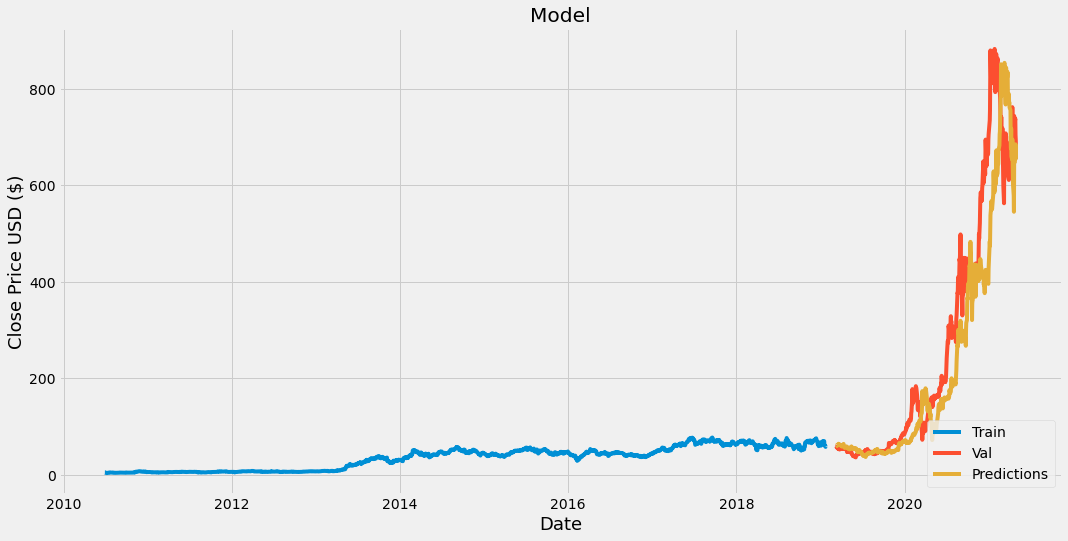

In [35]:
train = data[:test_size]
valid = data[test_size+feature_prediction:]
valid['Predictions'] = lr.predict(x_test)

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()